In [441]:
import json
import logging
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from collections import defaultdict

logger = logging.getLogger()
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
logging.root.setLevel(level=logging.INFO)

class plot_accuracy_precision_recall():
    '''...'''

    def __init__(self, path_to_data, path_to_output):
        self.path_to_data = path_to_data
        self.d = { 
        'Dictionary - stemmed' : 'Dictionary - stemmed' ,
        'Dictionary - not stemmed' : 'Dictionary - not stemmed',
        'SGD tfidf': 'SGD tfidf', 
        'SGD count': 'SGD count', 
        'SGD count embedding 300 15':'SGD count embedding mean, d=300, s=15',
        'SGD tfidf embedding 300 15':'SGD tfidf embedding mean, d=300, s=15',
        'SGD count embedding sum 300 15':'SGD count embedding sum, d=300, s=15',
        'SGD tfidf embedding sum 300 15':'SGD tfidf embedding sum, d=300, s=15',
        'SGD count embedding max 300 15':'SGD count embedding max, d=300, s=15',
        'SGD tfidf embedding max 300 15':'SGD tfidf embedding max, d=300, s=15',
        'SGD count embedding 300 10':'SGD count embedding mean, d=300, s=10',
        'SGD tfidf embedding 300 10':'SGD tfidf embedding mean, d=300, s=10',
        'SGD count embedding sum 300 10':'SGD count embedding sum, d=300, s=10',
        'SGD tfidf embedding sum 300 10':'SGD tfidf embedding sum, d=300, s=10',
        'SGD count embedding max 300 10':'SGD count embedding max, d=300, s=10',
        'SGD tfidf embedding max 300 10':'SGD tfidf embedding max, d=300, s=10',
        'SGD count embedding 100 10':'SGD count embedding mean, d=100, s=10',
        'SGD tfidf embedding 100 10':'SGD tfidf embedding mean, d=100, s=10',
        'SGD count embedding sum 100 10':'SGD count embedding sum, d=100, s=10',
        'SGD tfidf embedding sum 100 10':'SGD tfidf embedding sum, d=100, s=10',
        'SGD count embedding max 100 10':'SGD count embedding max, d=100, s=10',
        'SGD tfidf embedding max 100 10':'SGD tfidf embedding max, d=100, s=10',
        'SGD count embedding 100 15':'SGD count embedding mean, d=100, s=15',
        'SGD tfidf embedding 100 15':'SGD tfidf embedding mean, d=100, s=15',
        'SGD count embedding sum 100 15':'SGD count embedding sum, d=100, s=15',
        'SGD tfidf embedding sum 100 15':'SGD tfidf embedding sum, d=100, s=15',
        'SGD count embedding max 100 15':'SGD count embedding max, d=100, s=15',
        'SGD tfidf embedding max 100 15':'SGD tfidf embedding max, d=100, s=15',
        'SVC tfidf': 'SVC tfidf', 
        'SVC count': 'SVC count', 
        'SVC count embedding 300 15':'SVC count embedding mean, d=300, s=15',
        'SVC tfidf embedding 300 15':'SVC tfidf embedding mean, d=300, s=15',
        'SVC count embedding sum 300 15':'SVC count embedding sum, d=300, s=15',
        'SVC tfidf embedding sum 300 15':'SVC tfidf embedding sum, d=300, s=15',
        'SVC count embedding max 300 15':'SVC count embedding max, d=300, s=15',
        'SVC tfidf embedding max 300 15':'SVC tfidf embedding max, d=300, s=15',
        'SVC count embedding 100 15':'SVC count embedding mean, d=100, s=15',
        'SVC tfidf embedding 100 15':'SVC tfidf embedding mean, d=100, s=15',
        'SVC count embedding sum 100 15':'SVC count embedding sum, d=100, s=15',
        'SVC tfidf embedding sum 100 15':'SVC tfidf embedding sum, d=100, s=15',
        'SVC count embedding max 100 15':'SVC count embedding max, d=100, s=15',
        'SVC tfidf embedding max 100 15':'SVC tfidf embedding max, d=100, s=15',
        'SVC count embedding 100 10':'SVC count embedding mean, d=100, s=10',
        'SVC tfidf embedding 100 10':'SVC tfidf embedding mean, d=100, s=10',
        'SVC count embedding sum 100 10':'SVC count embedding sum, d=100, s=10',
        'SVC tfidf embedding sum 100 10':'SVC tfidf embedding sum, d=100, s=10',
        'SVC count embedding max 100 10':'SVC count embedding max, d=100, s=10',
        'SVC tfidf embedding max 100 10':'SVC tfidf embedding max, d=100, s=10',
        'SVC count embedding 300 10':'SVC count embedding mean, d=300, s=10',
        'SVC tfidf embedding 300 10':'SVC tfidf embedding mean, d=300, s=10',
        'SVC count embedding sum 300 10':'SVC count embedding sum, d=300, s=10',
        'SVC tfidf embedding sum 300 10':'SVC tfidf embedding sum, d=300, s=10',
        'SVC count embedding max 300 10':'SVC count embedding max, d=300, s=10',
        'SVC tfidf embedding max 300 10':'SVC tfidf embedding max, d=300, s=10',
        'PA tfidf': 'PA tfidf', 
        'PA count': 'PA count', 
        'PA count embedding 300 15':'PA count embedding mean, d=300, s=15',
        'PA tfidf embedding 300 15':'PA tfidf embedding mean, d=300, s=15',
        'PA count embedding sum 300 15':'PA count embedding sum, d=300, s=15',
        'PA tfidf embedding sum 300 15':'PA tfidf embedding sum, d=300, s=15',
        'PA count embedding max 300 15':'PA count embedding max, d=300, s=15',
        'PA tfidf embedding max 300 15':'PA tfidf embedding max, d=300, s=15',
        'PA count embedding 100 15':'PA count embedding mean, d=100, s=15',
        'PA tfidf embedding 100 15':'PA tfidf embedding mean, d=100, s=15',
        'PA count embedding sum 100 15':'PA count embedding sum, d=100, s=15',
        'PA tfidf embedding sum 100 15':'PA tfidf embedding sum, d=100, s=15',
        'PA count embedding max 100 15':'PA count embedding max, d=100, s=15',
        'PA tfidf embedding max 100 15':'PA tfidf embedding max, d=100, s=15',
        'PA count embedding 100 10':'PA count embedding mean, d=100, s=10',
        'PA tfidf embedding 100 10':'PA tfidf embedding mean, d=100, s=10',
        'PA count embedding sum 100 10':'PA count embedding sum, d=100, s=10',
        'PA tfidf embedding sum 100 10':'PA tfidf embedding sum, d=100, s=10',
        'PA count embedding max 100 10':'PA count embedding max, d=100, s=10',
        'PA tfidf embedding max 100 10':'PA tfidf embedding max, d=100, s=10',
        'PA count embedding 300 10':'PA count embedding mean, d=300, s=10',
        'PA tfidf embedding 300 10':'PA tfidf embedding mean, d=300, s=10',
        'PA count embedding sum 300 10':'PA count embedding sum, d=300, s=10',
        'PA tfidf embedding sum 300 10':'PA tfidf embedding sum, d=300, s=10',
        'PA count embedding max 300 10':'PA count embedding max, d=300, s=10',
        'PA tfidf embedding max 300 10':'PA tfidf embedding max, d=300, s=10',
        'ET tfidf': 'ET tfidf', 
        'ET count': 'ET count', 
        'ET count embedding 100 15':'ET count embedding mean, d=100, s=15',
        'ET tifdf embedding 100 15':'ET tifdf embedding mean, d=100, s=15',
        'ET count embedding sum 100 15':'ET count embedding sum, d=100, s=15',
        'ET tifdf embedding sum 100 15':'ET tifdf embedding sum, d=100, s=15',
        'ET count embedding max 100 15':'ET count embedding max, d=100, s=15',
        'ET tifdf embedding max 100 15':'ET tifdf embedding max, d=100, s=15',
        'ET count embedding 100 10':'ET count embedding mean, d=100, s=10',
        'ET tifdf embedding 100 10':'ET tifdf embedding mean, d=100, s=10',
        'ET count embedding sum 100 10':'ET count embedding sum, d=100, s=10',
        'ET tifdf embedding sum 100 10':'ET tifdf embedding sum, d=100, s=10',
        'ET count embedding max 100 10':'ET count embedding max, d=100, s=10',
        'ET tifdf embedding max 100 10':'ET tifdf embedding max, d=100, s=10',
        'ET count embedding 300 10':'ET count embedding mean, d=300, s=10',
        'ET tifdf embedding 300 10':'ET tifdf embedding mean, d=300, s=10',
        'ET count embedding sum 300 10':'ET count embedding sum, d=300, s=10',
        'ET tifdf embedding sum 300 10':'ET tifdf embedding sum, d=300, s=10',
        'ET count embedding max 300 10':'ET count embedding max, d=300, s=10',
        'ET tifdf embedding max 300 10':'ET tifdf embedding max, d=300, s=10',
        'ET count embedding 300 15':'ET count embedding mean, d=300, s=15',
        'ET tifdf embedding 300 15':'ET tifdf embedding mean, d=300, s=15',
        'ET count embedding sum 300 15':'ET count embedding sum, d=300, s=15',
        'ET tifdf embedding sum 300 15':'ET tifdf embedding sum, d=300, s=15',
        'ET count embedding max 300 15':'ET count embedding max, d=300, s=15',
        'ET tifdf embedding max 300 15':'ET tifdf embedding max, d=300, s=15' }
        
        #self.emb = self.Vectorizer_dict()
        self.emb = self.Vectorizer_dict_()
        self.algorithm = self.Get_algorithm()
        self.path_to_output = path_to_output
        self.translator = {'hmnintrst' : 'Human interest', 'ecnmc' : 'Economic consequences', 'cnflct' : 'Conflict',
                           'attrresp' : 'Attribution of responsibility'}
  #      with open('../resources/numbers_to_topic.json') as handle:
   #            self.translator_numeric = json.loads(handle.read())
    def Vectorizer_dict(self):
        new_dict = defaultdict()
        for k, v in self.d.items():
            try:
                if v.split()[2] == 'embedding':
                    outcome = f'{v.split()[1]} embedding vectorizer'
                else:
                    outcome =  v
            except:
                outcome = f'{v.split()[1]} vectorizer'

            new_dict[v] = outcome
        return new_dict
    
    def Vectorizer_dict_(self):
        new_dict = defaultdict()
        for k, v in self.d.items():
            try:
                if v.split()[2] == 'embedding':
                    outcome = f'embedding vectorizer'
                else:
                    outcome =  v
            except:
                #outcome = f'{v.split()[1]} vectorizer'
                outcome = f'baseline vectorizer'

            new_dict[v] = outcome
        return new_dict

    def Get_algorithm(self):
        new_dict = defaultdict()
        for k, v in self.d.items():
            new_dict[v] = v.split()[0]
        return new_dict
    
    def Clean_dictionary_data(self, fname):
        
        logger.info(fname)
        with open(fname) as handle:
            dictdump =  json.loads(handle.read())

        frames = []
        precision = []
        recall = []
        f1score=[]
        accuracy=[]
        trainingsize = []

        for i in dictdump:
            for k, v in i.items():
                for keys, values in v.items():
                    frames.append(keys)
                    precision.append(values[0])
                    recall.append(values[1])
                    f1score.append(values[2])
                    accuracy.append(values[3])
                    trainingsize.append(k)
                    
        df = pd.DataFrame(list(zip(frames,precision,recall,f1score,accuracy,trainingsize)))
        df.rename(columns={0 :'frame',  1 :'precision', 2 :'recall', 3 : 'f1-score', 4 : 'accuracy', 5: 'training size'}, inplace=True)
        df.set_index('frame', inplace=True)

        return df
    
    def get_data_dictionary(self):
        
        fname =  f'{self.path_to_data}precision_recall_f1score_dictionary_stemmed_FRAMES.json'
        df1 = self.Clean_dictionary_data(fname)
        df1['classifier'] = 'Dictionary - stemmed'

        fname_notstemmed = f'{self.path_to_data}precision_recall_f1score_dictionary_not_stemmed_FRAMES.json'
        df2 =  df = self.Clean_dictionary_data(fname_notstemmed)
        df2['classifier'] = 'Dictionary - not stemmed'

        df = pd.concat([df1, df2])
        #df.rename(columns={0 :'precision',  1 :'recall', 2 :'f1-score', 3 : 'accuracy'}, inplace=True)
        df.rename(index=self.translator, inplace=True)
        df['approach'] = 'Dictionary Approach'
        return df

    def get_data_sml(self):

        fname_sml = '{}learning_rate_SML.csv'.format(self.path_to_data)
        
        df = pd.read_csv(fname_sml)
        df['frame'].replace(self.translator, inplace=True)
        df.set_index('frame', inplace=True)

        df = df[['algorithm','f1_weighted', 'precision_weighted',  'recall_score_weighted', 'accuracy', 'length_training_set']]
        df.rename(columns={'algorithm': 'classifier', 'f1_weighted' : 'f1-score', 'precision_weighted' : 'precision', 'recall_score_weighted' : 'recall', 'length_training_set': 'training size'}, inplace=True)
        df['approach'] = 'SML'

        return df

    def combine_datasets(self):
        df1 = self.get_data_dictionary()
        df2 = self.get_data_sml()
        df = pd.concat([df1, df2])
     #   df.drop('total', inplace=True)
        df['Frame'] = df.index
        df.reset_index(inplace=True)
        df['classifier'] = df['classifier'].map(self.d)
        df['vectorizer'] = df['classifier'].map(self.emb)
        df['algorithm'] = df['classifier'].map(self.algorithm)
        df["training size"] = pd.to_numeric(df["training size"])
        return df
    

In [442]:
path_to_data = '/home/anne/RPA-data/output/frames/'
path_to_output ='/home/anne/RPA-data/output/'

a = plot_accuracy_precision_recall(path_to_data, path_to_output)
df = a.combine_datasets()

2020-11-25 11:56:14,083 : INFO : /home/anne/RPA-data/output/frames/precision_recall_f1score_dictionary_stemmed_FRAMES.json
2020-11-25 11:56:14,101 : INFO : /home/anne/RPA-data/output/frames/precision_recall_f1score_dictionary_not_stemmed_FRAMES.json


In [443]:
df[ ( df['training size'] == 860 ) & (df['Frame'] == 'Conflict') ].sort_values(['f1-score'], ascending=False).head(4)

,frame,precision,recall,f1-score,accuracy,training size,classifier,approach,Frame,vectorizer,algorithm
36161,Conflict,0.650437,0.650224,0.649490,0.650224,860,"SGD tfidf embedding mean, d=300, s=10",SML,Conflict,embedding vectorizer,SGD
36155,Conflict,0.624131,0.623318,0.623273,0.623318,860,"SGD tfidf embedding mean, d=300, s=15",SML,Conflict,embedding vectorizer,SGD
36157,Conflict,0.605834,0.605381,0.605413,0.605381,860,"SGD tfidf embedding sum, d=300, s=15",SML,Conflict,embedding vectorizer,SGD
36231,Conflict,0.600729,0.600897,0.600704,0.600897,860,ET count,SML,Conflict,baseline vectorizer,ET


In [446]:
def get_best_results(frame):
    df__ = df [ (df['training size'] == 860 ) & (df['frame'] == frame) ].sort_values(['f1-score'], ascending=False).groupby('vectorizer').head(3)
    df__ = df__[['precision', 'recall', 'f1-score', 'classifier', 'vectorizer']]
    fname = f'/home/anne/RPA/output/{frame}.csv'
    df__.to_csv(fname)
    print(f'saved file at location: {fname}')
    #print(df__)
    return df__

for i in  ['Attribution of responsibility', 'Conflict', 'Economic consequences', 'Human interest'] :
    get_best_results(i)
    
conflict = get_best_results('Conflict')
ec = get_best_results('Economic consequences')
hi = get_best_results('Human interest')

saved file at location: /home/anne/RPA/output/Attribution of responsibility.csv
saved file at location: /home/anne/RPA/output/Conflict.csv
saved file at location: /home/anne/RPA/output/Economic consequences.csv
saved file at location: /home/anne/RPA/output/Human interest.csv
saved file at location: /home/anne/RPA/output/Conflict.csv
saved file at location: /home/anne/RPA/output/Economic consequences.csv
saved file at location: /home/anne/RPA/output/Human interest.csv


In [445]:
df [ (df['training size'] == 860 ) & (df['frame'] == 'Attribution of responsibility') ].sort_values(['f1-score'], ascending=False).groupby('vectorizer').head(3)

,frame,precision,recall,f1-score,accuracy,training size,classifier,approach,Frame,vectorizer,algorithm
36079,Attribution of responsibility,0.685928,0.681614,0.671404,0.681614,860,"SVC tfidf embedding sum, d=300, s=15",SML,Attribution of responsibility,embedding vectorizer,SVC
36097,Attribution of responsibility,0.681614,0.677130,0.666189,0.677130,860,"SVC tfidf embedding sum, d=300, s=10",SML,Attribution of responsibility,embedding vectorizer,SVC
36091,Attribution of responsibility,0.668519,0.663677,0.650338,0.663677,860,"SVC tfidf embedding sum, d=100, s=10",SML,Attribution of responsibility,embedding vectorizer,SVC
36048,Attribution of responsibility,0.572404,0.578475,0.569727,0.578475,860,SGD tfidf,SML,Attribution of responsibility,baseline vectorizer,SGD
36100,Attribution of responsibility,0.568664,0.573991,0.567972,0.573991,860,PA tfidf,SML,Attribution of responsibility,baseline vectorizer,PA
36049,Attribution of responsibility,0.557848,0.565022,0.555357,0.565022,860,SGD count,SML,Attribution of responsibility,baseline vectorizer,SGD
340,Attribution of responsibility,0.561548,0.484305,0.405119,0.484305,860,Dictionary - stemmed,Dictionary Approach,Attribution of responsibility,Dictionary - stemmed,Dictionary
684,Attribution of responsibility,0.638995,0.493274,0.391822,0.493274,860,Dictionary - not stemmed,Dictionary Approach,Attribution of responsibility,Dictionary - not stemmed,Dictionary


In [81]:
df[ ( df['training size'] == 860 ) & (df['Frame'] == 'Economic consequences') ].sort_values(['Frame', 'accuracy'], ascending=False).head(4)

,frame,precision,recall,f1-score,accuracy,training size,classifier,approach,Frame,vectorizer,algorithm
36309,Economic consequences,0.825659,0.816143,0.806372,0.816143,860,PA count,SML,Economic consequences,baseline vectorizer,PA
36288,Economic consequences,0.814974,0.811659,0.804132,0.811659,860,"SVC count embedding max, d=300, s=15",SML,Economic consequences,embedding vectorizer,SVC
36289,Economic consequences,0.814974,0.811659,0.804132,0.811659,860,"SVC tfidf embedding max, d=300, s=15",SML,Economic consequences,embedding vectorizer,SVC
36316,Economic consequences,0.801139,0.802691,0.801644,0.802691,860,"PA count embedding mean, d=100, s=15",SML,Economic consequences,embedding vectorizer,PA


In [82]:
df[ ( df['training size'] == 860 ) & (df['Frame'] == 'Human interest') ].sort_values(['Frame', 'accuracy'], ascending=False).head(4)

,frame,precision,recall,f1-score,accuracy,training size,classifier,approach,Frame,vectorizer,algorithm
36449,Human interest,0.773180,0.798206,0.771373,0.798206,860,"ET tifdf embedding sum, d=100, s=10",SML,Human interest,embedding vectorizer,ET
36458,Human interest,0.772622,0.798206,0.768192,0.798206,860,"ET count embedding mean, d=300, s=15",SML,Human interest,embedding vectorizer,ET
36461,Human interest,0.773993,0.798206,0.757296,0.798206,860,"ET tifdf embedding sum, d=300, s=15",SML,Human interest,embedding vectorizer,ET
36381,Human interest,0.765217,0.793722,0.753917,0.793722,860,"SGD tfidf embedding mean, d=100, s=15",SML,Human interest,embedding vectorizer,SGD


In [336]:
from collections import Counter
import itertools

df.sort_values(['training size'])['training size'].to_list()
trainsize = df['training size'].to_list()
a = dict(Counter(trainsize))

repeat = [v for k, v in a.items()][0]

STEPS = 2

new = df['training size'].unique()[1::STEPS]
new_list = list(itertools.chain.from_iterable(itertools.repeat(x, repeat * STEPS) for x in new)) + [df['training size'].unique()[-1]] * (repeat *2)

final = []
for i, e in zip(trainsize, new_list):
    final.append(e)

df.sort_values(['training size'], inplace=True)
df['aggregate'] = final
df_ = df.groupby(['aggregate', 'frame', 'classifier', 'vectorizer']).mean()
df_.reset_index(inplace=True)

,aggregate,frame,classifier,vectorizer,precision,recall,f1-score,accuracy,training size
0,20,Attribution of responsibility,Dictionary - not stemmed,Dictionary - not stemmed,0.560225,0.531390,0.520174,0.531390,15.0
1,20,Attribution of responsibility,Dictionary - stemmed,Dictionary - stemmed,0.578099,0.547085,0.536361,0.547085,15.0
2,20,Attribution of responsibility,ET count,baseline vectorizer,0.304229,0.551570,0.392156,0.551570,15.0
3,20,Attribution of responsibility,"ET count embedding max, d=100, s=10",embedding vectorizer,0.534227,0.549327,0.465566,0.549327,15.0
4,20,Attribution of responsibility,"ET count embedding max, d=100, s=15",embedding vectorizer,0.528862,0.549327,0.457073,0.549327,15.0
...,...,...,...,...,...,...,...,...,...
18227,860,Human interest,"SVC tfidf embedding mean, d=300, s=15",embedding vectorizer,0.739483,0.780269,0.728752,0.780269,855.0
18228,860,Human interest,"SVC tfidf embedding sum, d=100, s=10",embedding vectorizer,0.738353,0.778027,0.738313,0.778027,855.0
18229,860,Human interest,"SVC tfidf embedding sum, d=100, s=15",embedding vectorizer,0.745327,0.782511,0.741581,0.782511,855.0
18230,860,Human interest,"SVC tfidf embedding sum, d=300, s=10",embedding vectorizer,0.753129,0.786996,0.746888,0.786996,855.0


In [301]:
df [ (df['training size'] == 860 ) & (df['frame'] == 'Attribution of responsibility') ].sort_values(['f1-score'], ascending=False).groupby('vectorizer')['classifier'].head(1)

36079    SVC tfidf embedding sum, d=300, s=15
36048                               SGD tfidf
340                      Dictionary - stemmed
684                  Dictionary - not stemmed
Name: classifier, dtype: object

Attribution of responsibility
['SVC tfidf embedding sum, d=300, s=15', 'SGD tfidf', 'Dictionary - stemmed', 'Dictionary - not stemmed']


2020-11-24 13:35:05,023 : INFO : saved file: /home/anne/RPA-data/output/lineplot-Attribution of responsibility-top-1


Conflict
['SGD tfidf embedding mean, d=300, s=10', 'ET count', 'Dictionary - not stemmed', 'Dictionary - stemmed']


2020-11-24 13:35:05,560 : INFO : saved file: /home/anne/RPA-data/output/lineplot-Conflict-top-1


Economic consequences
['PA count', 'SVC count embedding max, d=300, s=15', 'Dictionary - not stemmed', 'Dictionary - stemmed']


2020-11-24 13:35:06,124 : INFO : saved file: /home/anne/RPA-data/output/lineplot-Economic consequences-top-1


Human interest
['PA tfidf', 'ET tifdf embedding sum, d=100, s=10', 'Dictionary - not stemmed', 'Dictionary - stemmed']


2020-11-24 13:35:06,676 : INFO : saved file: /home/anne/RPA-data/output/lineplot-Human interest-top-1


<Figure size 842.4x595.44 with 0 Axes>

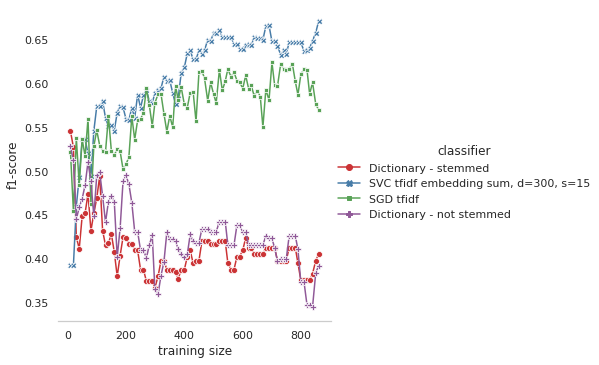

<Figure size 842.4x595.44 with 0 Axes>

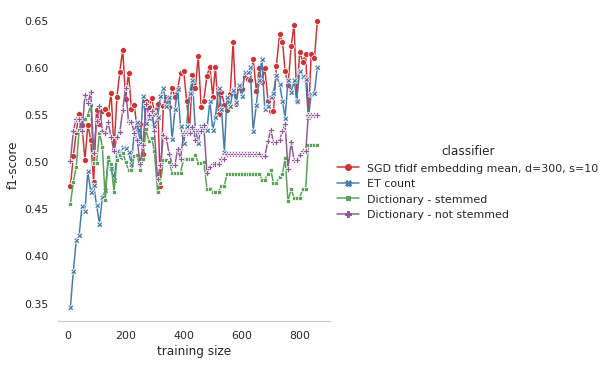

<Figure size 842.4x595.44 with 0 Axes>

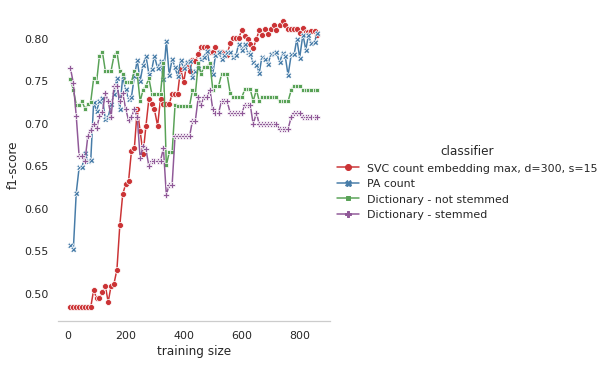

<Figure size 842.4x595.44 with 0 Axes>

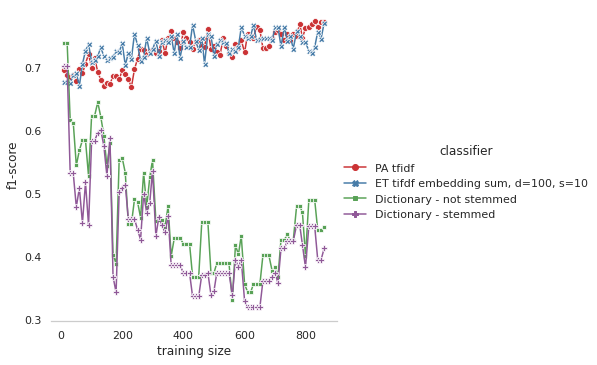

In [339]:
import seaborn
import matplotlib.pyplot as plt
from pylab import savefig
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_palette("Set1", 8, .75)

class Make_learning_curves():
    
    def __init__(self, df, outputpath):
        self.frames = ['Attribution of responsibility', 'Conflict', 'Economic consequences', 'Human interest']
        self.df = df
        self.topN = 1
        self.outputpath = outputpath
        self.metric = 'f1-score'
        
    def Return_best_classifiers(self, frame):
        #return self.df[ ( self.df['training size'] == 860 ) & (df['frame'] == frame) ].sort_values(['Frame', self.metric], ascending=False)['classifier'].head(self.topN).to_list()
       # print(self.df [ (self.df['training size'] == 860 ) & (df['frame'] == frame) ].sort_values([self.metric], ascending=False).groupby('vectorizer')['classifier'].head(self.topN).to_list())
        return self.df [ (self.df['training size'] == 860 ) & (df['frame'] == frame) ].sort_values([self.metric], ascending=False).groupby('vectorizer')['classifier'].head(self.topN).to_list()

    
    def Return_best_of_vectorizers(self, frame):
        data = self.df[self.df['frame']==frame]
        data = data.loc[data.groupby('vectorizer')[self.metric].idxmax()]
        return data['classifier'].to_list()

    def Get_line_plot(self,frame):
        best_results = self.Return_best_classifiers(frame)
        #best_results = self.Return_best_of_vectorizers(frame)
        print(best_results)

        data = self.df[self.df["frame"]== frame]
        data = data[data['classifier'].isin(best_results)]
        #data = data[~data['classifier'].isin(['Dictionary - stemmed', 'Dictionary - not stemmed'])]
        
       # print(len(data['vectorizer'].unique() ) )
        pal_ = ['silver', 'dimgrey', 'black', 'grey']
        pal = pal_[:len(data['vectorizer'].unique() )] 
        hue_order = ['embedding vectorizer', 'tfidf vectorizer', 'count vectorizer']
        hue_order = hue_order [:len(data['vectorizer'].unique() )] 
         
        plt.figure()

        fig = sns.relplot(data=data, 
                     x="training size", 
                     y=self.metric, 
                     hue='classifier', 
                     kind='line',
                    # ci="sd",
                    # hue_order =hue_order, 
                     style = 'classifier',
                     #palette=pal,
                     markers=True, dashes=False )
                            
                     #palette=pal) 
        return fig, data
    
    def Get_figures_and_save(self):
        for frame in self.frames:
            print(frame)
            fig, data = self.Get_line_plot(frame)
            
            fig.despine(left=True)
           # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            fname = f"{self.outputpath}lineplot-{frame}-top-{self.topN}"
            #figure = fig.get_figure()
            fig.savefig(fname)
            logging.info(f'saved file: {fname}')

k = Make_learning_curves(df = df, outputpath = '/home/anne/RPA-data/output/')
k.Get_figures_and_save()

# Getting same classification examples

In [385]:
import eli5
import pandas as pd
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
import gensim
import embeddingvectorizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


df = pd.read_pickle('../data/intermediate/RPA_data_with_dictionaryscores.pkl')
X_train , X_test, y_train, y_test = train_test_split(df['text_clean'], df['main_topic_label'], test_size = 0.2 , random_state =0)


#X_train , X_test, y_train, y_test = train_test_split(df['text_clean'], df['main_topic_label'], test_size = 0.2 , random_state =0)
#df.rename(columns= {'text_clean': 'text'}, inplace=True)
#X_train, X_test, y_train, y_test = train_test_split(df['text'], df['attrresp'], test_size=0.2, random_state=0)

In [368]:
mod = gensim.models.Word2Vec.load('/home/anne/RPA-data/output/w2v_size_300_window_10_negative_15')
MDL = dict(zip(mod.wv.index2word, mod.wv.syn0))

2020-11-24 14:06:45,617 : INFO : loading Word2Vec object from /home/anne/RPA-data/output/w2v_size_300_window_10_negative_15
2020-11-24 14:07:27,021 : INFO : loaded /home/anne/RPA-data/output/w2v_size_300_window_10_negative_15
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


In [129]:
#attrresp : SVC tifidf embedding sum 300 10 vs. SGD tfidf 
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

In [386]:
pipeline_mean = Pipeline([
                ('vect', embeddingvectorizer.EmbeddingCountVectorizer(MDL, 'mean')),
                ('clf', SGDClassifier() ),
            ])

clf = pipeline_mean.fit(X_train, y_train)
y_preds_embedding = clf.predict(X_test)

f1_score(y_test, y_preds_embedding  , average='weighted') 

0.5251129471446365

In [387]:
SGD_tfidf_pipeline = Pipeline([
     ('tfidf', TfidfVectorizer()),
     ('clf', SGDClassifier() ),
    ])

clf = SGD_tfidf_pipeline.fit(X_train, y_train)
y_preds_tfidf = clf.predict(X_test)

f1_score(y_test, y_preds_tfidf , average='weighted') 

0.5793159987956239

In [414]:
d = pd.DataFrame(data={'predictions_embeddings': y_preds_embedding, 'predictions_count': y_preds_tfidf, 'actual': y_test, 'text': X_test})
#d [ ( d['predictions_embeddings'] == 1) & ( d['actual'] == 1) &  ( d['predictions_count'] == 0) ]
#
#predictions = d [ (d['predictions_embeddings'] == d['actual'])]
#predictions.loc[352]['text']

dictionary = df['topic_label_dictionary']
merged = pd.concat([d, dictionary], axis=1, join='inner')


# examples misclassifications

In [424]:
merged[ ( merged['predictions_embeddings'] == merged['actual']) & ( merged['predictions_count'] != merged['actual']) ].loc[751]

predictions_embeddings                                               Milieu
predictions_count                                                   Overige
actual                                                               Milieu
text                      delta radio kilometer kust walcheren zendmaste...
topic_label_dictionary                                              Overige
Name: 751, dtype: object

In [423]:
df.loc[751].values[0]

" Delta Radio wil op 25 kilometer voor de kust van Walcheren twee zendmasten van elk 400 meter hoog plaatsen voor commerciele uitzendingen die op West-Europa zijn gericht. Het radiostation onderzoekt deze mogelijkheid, omdat plaatsing van de antennes in het zenderpark Kootwijk op veel problemen is gestuit. Van onze verslaggeefster AMSTERDAM Volgens M. Hidajattoellah, woordvoerder van Delta Radio, zijn de omroep- en uitzendvergunningen al rond. Het wachten is nog op toestemming voor plaatsing van de twee zendmasten van de directie Noordzee van het ministerie van Verkeer en Waterstaat. Omdat de masten in de Noordzee staan, buiten de territoriale wateren en niet vlak voor de kust binnen de twaalfmijlszone, kan het ministerie ze moeilijk weigeren. Het Tweede-Kamerlid J.J. Feenstra (PvdA) noemt dit merkwaardig. 'Het is vreemd dat de overheid dit soort activiteiten niet beoordeelt. Als dit kan, kan er meer', aldus Feenstra. 'Kennelijk is het buiten de twaalfmijlszone terra incognita.' Het Ka

In [425]:
#eli5.show_prediction(clf, predictions['text'].loc[[60]].values[0], vec=vec)

In [237]:
pipeline_sum = Pipeline([
                ('vect', CountVectorizer() ) , 
                ('clf', SGDClassifier() ),
            ])

clf = pipeline_sum.fit(X_train, y_train)
y_preds_counts = clf.predict(X_test)

f1_score(y_test, y_preds_embeddings , average='weighted') 

0.49734988504144884

In [239]:
eli5.show_prediction(clf, predictions['text'].loc[[352]].values[0], vec=vec)

In [216]:
eli5.show_weights(clf)

In [ ]:
eli5.show_weights(clf_pipe top=20)

In [244]:
vec= TfidfVectorizer()
clf = SGDClassifier()

pipe = make_pipeline(vec, clf)
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('sgdclassifier', SGDClassifier())])

In [245]:
eli5.show_weights(clf, vec=vec, top=20)

In [246]:
#predictions['text'].loc[[60]].values[0]
eli5.show_prediction(clf, predictions['text'].loc[[352]].values[0], vec=vec)